**Лабораторки по `pandas` для `numpy`**

In [1]:
import pandas as pd
import numpy as np

# Лаб 27

Имена для ряда и его индекса.

In [2]:
test_ser = pd.Series(np.random.rand(10))

test_ser.name = "случайные числа"
test_ser.index.name = "индекс"
test_ser

индекс
0    0.289295
1    0.003226
2    0.538430
3    0.360123
4    0.290216
5    0.275428
6    0.074110
7    0.732775
8    0.388241
9    0.176303
Name: случайные числа, dtype: float64

Оказалось при обращении по индексам произвольного типа можно делать срезы.

In [3]:
countries = pd.DataFrame(
    {
        "name" : ["Belarus", "Russia", "Ukraine", "Kazahstan"],
        "population" : [9.5, 143.5, 45.5, 17.04],
        "square" : [2724902, 17125191, 207600, 603628]
    },
    index = ["BY", "RU", "UK", "KZ"]
)

countries["BY":"UK"]

,name,population,square
BY,Belarus,9.5,2724902
RU,Russia,143.5,17125191
UK,Ukraine,45.5,207600


**Задание**

Поместите данные в объект Series (используйте ассоциированные метки)
произведите поиск информации с помощью меток.

Оаказалось, что ассоциированные метки - это тоже самое, что и индекс.

In [4]:
# создание 
ser = pd.Series(np.random.rand(200))
# поиск
ser[4:7]

4    0.123648
5    0.113349
6    0.464363
dtype: float64

In [5]:
df = pd.DataFrame({
    "col1" : [1,2,3,4,5],
    "col2" : np.random.rand(5)
})

df["new_col"] = ser[:5]

# Как прочитать Excel

In [6]:
df = pd.read_excel("countries.xlsx")

In [7]:
df =pd.read_excel("countries.xlsx", index_col = 0)

In [8]:
df = pd.read_excel("countries2.xlsx", index_col = 0, header = [4,5])
df

колонки      колонка
code    col1 col2  value3
BLR        4    5    test
KAZ        2    4   test2
RUS        4    4   test3
UKR        3    4   hello

In [9]:
df.to_excel("test.xlsx")

# Лаб 28

## `groupby`

Мой интерес привелек пример с применением `groupby` по двум столбцам

In [10]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.columns

Index(['PassengerID', 'Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode'], dtype='object')

In [11]:
titanic_df.groupby(['Sex', 'Survived'])["PassengerID"].count()

Sex     Survived
female  0           154
        1           308
male    0           709
        1           142
Name: PassengerID, dtype: int64

## `pivot_table`

Знал про эту возможность но никогда не пользовался, самое время начать изучать его.

In [12]:
titanic_df.pivot_table(
    index = ['Sex'], columns = ['PClass'],
    values = 'Name', aggfunc = 'count'
)

PClass,*,1st,2nd,3rd
Sex,,,,
female,NaN,143.0,107.0,212.0
male,1.0,179.0,172.0,499.0


Пока совсем не понятно, для чего это надо ведь функция `crosstab` позволяет добиться того-же результата.

In [13]:
pd.crosstab(
    titanic_df["Sex"],
    titanic_df["PClass"]
)

PClass,*,1st,2nd,3rd
Sex,,,,
female,0,143,107,212
male,1,179,172,499


## Анализ временных рядов

In [14]:
apple_df = pd.read_csv(
    "apple.csv", index_col = 'Date', parse_dates = True
).sort_index()

Вот так можно вывести инфу о `pandas.DataFrame`

In [15]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-02-23 to 2017-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


`pandas.DataFrame.resample` - функция о которой я чрезвычайно мало знаю. Тут получение средней цены акции в каждую неделю.

In [16]:
apple_df.resample('W')['Close'].mean()

Date
2012-02-26    519.399979
2012-03-04    538.652008
2012-03-11    536.254004
2012-03-18    576.161993
2012-03-25    600.990001
                 ...    
2017-01-29    121.164000
2017-02-05    125.867999
2017-02-12    131.679996
2017-02-19    134.978000
2017-02-26    136.904999
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

Для скорости в `pandas` уже вшит базовый `matplotlib`

<AxesSubplot:xlabel='Date'>

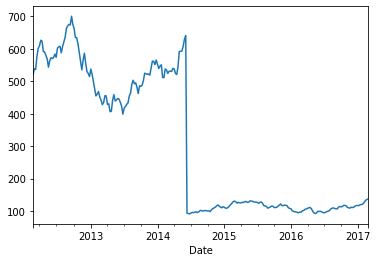

In [17]:
apple_df.resample('W')['Close'].mean().plot()

Интерестно, то, что можно делать такие необычние срезы для индекса даты. **НО ПЕРЕД ТАКОЙ ОПЕРАЦИЕЙ ОБЯЗАТЕЛЬНО ПРИДЕТСЯ ПРИМЕНИЕТЬ `sort_index`**

In [18]:
apple_df.loc['2012-Feb':'2017-Feb', ['Close']]

,Close
Date,
2012-02-23,516.389977
2012-02-24,522.409981
2012-02-27,525.760017
2012-02-28,535.410011
2012-02-29,542.440025
...,...
2017-02-15,135.509995
2017-02-16,135.350006
2017-02-17,135.720001


И так тоже сработает

In [19]:
apple_df.loc["2012-02":"2013-02"]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,142006900,66.903253
2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203
2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286
...,...,...,...,...,...,...
2013-02-22,449.250015,451.599976,446.599995,450.809998,82663700,59.268838
2013-02-25,453.850014,455.120003,442.569996,442.799988,93144800,58.215747
2013-02-26,443.820011,451.540001,437.660004,448.970009,125374900,59.026932


И так тоже стработатет

In [20]:
apple_df.loc["2012-02-01":"2013-02-01"]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,142006900,66.903253
2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203
2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286
...,...,...,...,...,...,...
2013-01-28,437.829994,453.209999,435.859989,449.830002,196379400,58.797324
2013-01-29,458.500000,460.200012,452.119987,458.269981,142789500,59.900515
2013-01-30,456.999992,462.600014,454.500015,456.830002,104288800,59.712295


## Задания этой лабораторной работы

Поместите данные в объект Series (используйте ассоциированные метки)
произведите поиск информации с помощью меток. <br>
Сгруппируйте данные, которые находятся в объекте Series, и поместите
их в объект DataFrame. Создайте таблицу. Выполните агрегирование данных.

In [21]:
import numpy as np
import pandas as pd

np.random.seed(10)

# ========================= создание данных===========================
# Симулируем временной ряд
sample_size = 40
ind = np.random.choice(
    pd.date_range(start='1/1/2018', end='1/08/2019'),
    sample_size
)

my_ser = pd.Series(
    np.random.uniform(-10, 10, sample_size),
    index = ind
).sort_index()
print("Исходный pandas.Series")
print(my_ser)
# ========================= создание данных===========================

# ========================= поиск информации =========================
# ========================= поиск информации =========================
# для того, чтобы сработало обязотельно применить sort_index
print("Поиск информации с помощью меток")
print(my_ser.loc[
    "2018-05-01":"2019-01-04"
])
# ========================= поиск информации =========================
# ========================= группировка и анрегирование ==============
# под группировкой я понимаю укрупнение показателя, т.е. возьмем диапазоны
res_df =  pd.DataFrame({
    "Исходный ряд":my_ser,
    "Группированный ряд":pd.cut(
        my_ser, [-np.inf, -5, 0, 5, np.inf]
    )
})
print("pandas.DataFrame с (в том числе) сгруппированным рядом")
print(res_df)

print("Агрегируем суммой")
print(res_df.groupby("Группированный ряд")["Исходный ряд"].sum())
# ========================= группировка и анрегирование ==============

Исходный pandas.Series
2018-01-09   -1.776349
2018-01-14   -1.272926
2018-01-16   -8.871116
2018-01-17    4.634692
2018-02-01   -7.460563
2018-02-03   -0.651934
2018-02-10   -1.200251
2018-02-24    6.639795
2018-02-24    3.180726
2018-03-04    9.660417
2018-03-15   -8.462890
2018-03-19    1.908792
2018-03-31   -2.549601
2018-05-03    7.447849
2018-05-04    2.238867
2018-05-06   -8.688735
2018-05-21   -9.951865
2018-05-22    1.742619
2018-06-06   -3.362355
2018-06-08    2.759031
2018-06-27   -7.374179
2018-06-29    6.856359
2018-07-20    7.514890
2018-08-10    1.192967
2018-08-28    5.337601
2018-09-01   -2.874993
2018-09-14    7.060860
2018-09-23   -4.328466
2018-10-14   -2.056710
2018-11-17    5.309116
2018-11-18    0.976327
2018-12-09   -6.575228
2018-12-11   -3.804439
2018-12-15   -7.010573
2018-12-23   -7.224351
2018-12-23   -4.078626
2018-12-30    1.951646
2019-01-05   -3.290007
2019-01-05   -9.764239
2019-01-07   -7.560917
dtype: float64
Поиск информации с помощью меток
2018-05-0

# Лаб 29

Работа с `pandas.MultiIndex`

### `pandas.Series` и `pandas.MultiIndex`

Тут ничего особенного, просто создание `pandas.MultiIndex`

In [22]:
mser = pd.Series(
    np.random.rand(8),
    index = [
        ['white','white','white','blue','blue','red','red','red'],
        ['up','down','right','up','down','up','down','left']
    ]
)

mser

white  up       0.079793
       down     0.235039
       right    0.659965
blue   up       0.214953
       down     0.203047
red    up       0.382865
       down     0.224873
       left     0.114649
dtype: float64

Что же объект описывает такой индекс?

Обращение к верхнему уроню кажется мне понятным

In [23]:
mser["red"]

up      0.382865
down    0.224873
left    0.114649
dtype: float64

Но, оказалось, можно еще и так - обратится к нижнему индексу.

In [24]:
mser[:, "up"]

white    0.079793
blue     0.214953
red      0.382865
dtype: float64

Вот еще новенькое для меня - функция `pandas.Series.unstack` позволяет привести ряд с `MultiIndex` к формату обычной таблицы, где первый урочень индекса станет колонками, а второй уровень индекса станет индексом в новой таблице.

In [25]:
mser.unstack()

,down,left,right,up
blue,0.203047,NaN,NaN,0.214953
red,0.224873,0.114649,NaN,0.382865
white,0.235039,NaN,0.659965,0.079793


Для обратного преобразования исопльзуется `pandas.DataFrame.Stack`. То есть, индекс преобразуемого `pandas.DataFrame` станет первым уровнем индекса `pandas.Series` результата, а колонки преобразуемого `pandas.DataFrame` станут вторым уровнем индекса.

In [26]:
test_frame = pd.DataFrame(
    np.random.rand(3,3),
    columns = ["hello", "friend", "col3"],
    index = ["moon", "is", "close"]
)

print(test_frame)
test_frame.stack()

          hello    friend      col3
moon   0.583017  0.232641  0.556518
is     0.523811  0.350958  0.705332
close  0.820704  0.134563  0.604726


moon   hello     0.583017
       friend    0.232641
       col3      0.556518
is     hello     0.523811
       friend    0.350958
       col3      0.705332
close  hello     0.820704
       friend    0.134563
       col3      0.604726
dtype: float64

### `pandas.DataFrame` и `pandas.MultiIndex`

Определение иерахического индекса для `pandas.DataFrame` может быть проведено следующим образом

In [27]:
pd.DataFrame(
    np.random.rand(4,4),
    columns = [
        ['a1', 'a1', 'a2', 'a2'],
        ['b1', 'b2', 'b3', 'b4']
    ],
    index = [
        ['1a', '1a', '1b', '1b'],
        ['2a', '2b', '2c', '2d']
    ]
)

a1                  a2          
             b1        b2        b3        b4
1a 2a  0.283148  0.506408  0.038460  0.332444
   2b  0.000273  0.664655  0.377441  0.747582
1b 2c  0.140576  0.388049  0.866492  0.956853
   2d  0.486554  0.105933  0.340037  0.835571

### Задание

Примените мультииндексирование к объекту Series из лабораторной
работы № 27

In [28]:
ser.index = pd.MultiIndex.from_product(
    [
        list("abcdefghijklmnopqrst"),
        list("abcdefghij")
    ]
)

ser

a  a    0.948550
   b    0.764690
   c    0.244522
   d    0.326298
   e    0.123648
          ...   
t  f    0.056992
   g    0.457988
   h    0.043312
   i    0.636200
   j    0.943986
Length: 200, dtype: float64

# Лаб 30

Перегрупприровка мультиндексов

### Экспериментальный набор данных

In [29]:
test_df = pd.DataFrame(
    np.random.rand(4,4),
    columns = pd.MultiIndex.from_product(
        [['pen', 'paper'],[1,2]]
    ),
    index = pd.MultiIndex.from_product(
        [['white', 'red'], ['up', 'down']],
        names = ['color', 'status']
    )
)

In [30]:
test_df

pen               paper          
                     1         2         1         2
color status                                        
white up      0.465442  0.092856  0.854694  0.337258
      down    0.606147  0.112665  0.543920  0.720799
red   up      0.865815  0.146701  0.103381  0.490555
      down    0.029180  0.594861  0.205845  0.202803

In [31]:
test_df.sort_index(level = 0, sort_remaining = True)

pen               paper          
                     1         2         1         2
color status                                        
red   down    0.029180  0.594861  0.205845  0.202803
      up      0.865815  0.146701  0.103381  0.490555
white down    0.606147  0.112665  0.543920  0.720799
      up      0.465442  0.092856  0.854694  0.337258

### `pandas.DataFrame.swaplevel`

In [32]:
test_df.swaplevel("color", "status")

pen               paper          
                     1         2         1         2
status color                                        
up     white  0.465442  0.092856  0.854694  0.337258
down   white  0.606147  0.112665  0.543920  0.720799
up     red    0.865815  0.146701  0.103381  0.490555
down   red    0.029180  0.594861  0.205845  0.202803

### Агрегирующим функциям в `pandas.DataFrame` можно указать уровень индекса по кторому следует агрегировать

In [33]:
test_df.sum(level = 1)

/tmp/ipykernel_7718/1885988432.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  test_df.sum(level = 1)


pen               paper          
               1         2         1         2
status                                        
up      1.331257  0.239557  0.958075  0.827813
down    0.635326  0.707526  0.749766  0.923602

Получаем предупреждение о том, что в будующих версиях все немного поменяется и следует использовать функцию `groupby`. Сделаем это с использованием `groupby`

In [34]:
test_df.groupby(level = 1).sum()

pen               paper          
               1         2         1         2
status                                        
down    0.635326  0.707526  0.749766  0.923602
up      1.331257  0.239557  0.958075  0.827813

Тоже самое и для колонок

In [35]:
test_df.groupby(level = 1, axis = 1).sum()

1         2
color status                    
white up      1.320136  0.430114
      down    1.150067  0.833463
red   up      0.969196  0.637256
      down    0.235025  0.797664

### Задание этой лабораторной работы

Примените перегруппировку к объекту Series из лабораторной работы №
27

In [36]:
ser.groupby(level = 1).mean()

a    0.511602
b    0.523327
c    0.413876
d    0.419465
e    0.615327
f    0.465660
g    0.385470
h    0.491813
i    0.404884
j    0.590889
dtype: float64

# Лаб 31

Реляционная алгебра

Лабораторка простая и у меня нет того набора данных который они используют, потому сразу перейду к заданию.

*Создайте два объекта Series с данными. Необходимо с помощью библио-
теки Pandas выполнить объединение двух наборами данных следующим обра-
зом:*

- inner;
- outer.

In [37]:
zoo_size = 20
animals = pd.DataFrame({
    "animals" : np.random.choice(
        ["monkey", "elephant", "tiger", "Doter"], zoo_size
    ),
    "weight" : np.random.uniform(0,1, zoo_size)
})

zoo_food = pd.DataFrame({
    "animals":["monkey", "elephant", "tiger", "Утконос"],
    "food" : ["banana", "ground", "meat", "Горчица"]
})

**inner**

In [38]:
animals.merge(zoo_food, how = "inner")

,animals,weight,food
0,elephant,0.210696,ground
1,elephant,0.647892,ground
2,elephant,0.812465,ground
3,tiger,0.949670,meat
4,tiger,0.137373,meat
5,tiger,0.744296,meat
6,tiger,0.346691,meat
7,tiger,0.037972,meat
8,tiger,0.817177,meat
9,monkey,0.695974,banana


**outer**

In [39]:
animals.merge(zoo_food, how = "outer")

,animals,weight,food
0,Doter,0.962197,NaN
1,Doter,0.815456,NaN
2,Doter,0.694227,NaN
3,Doter,0.517844,NaN
4,Doter,0.904665,NaN
5,elephant,0.210696,ground
6,elephant,0.647892,ground
7,elephant,0.812465,ground
8,tiger,0.949670,meat
9,tiger,0.137373,meat


Интерестно, что эта функция протащила с собой информацию об `Утконос` в таблицу результат, по моему другие функции с аналогичным функционалом так не могут.

# Лаб 32

Опять же нет необходимых данных для воспроизведения всех примеров приведённых в лабораторной, но оно и не требуется, потому как со всеми фнукциями я знаком, отработаю, лишь пожалуй использование функции `pandas.DataFrame.merge`. А именно аргуменов задающих поля по которым будет произведено соединение: `left_on`, `right_on`. B все это в рамках задания:

*Создайте два объекта Series с данными. Необходимо с помощью
библиотеки Pandas выполнить объединение двух наборами данных следующим
образом:*

- left;
- right.

`left`

In [45]:
animals.columns = ["animal", "weight"]

animals.merge(
    zoo_food, 
    how = "left",
    left_on = "animal",
    right_on = "animals"
)

,animal,weight,animals,food
0,Doter,0.962197,NaN,NaN
1,Doter,0.815456,NaN,NaN
2,Doter,0.694227,NaN,NaN
3,elephant,0.210696,elephant,ground
4,Doter,0.517844,NaN,NaN
5,tiger,0.949670,tiger,meat
6,monkey,0.695974,monkey,banana
7,Doter,0.904665,NaN,NaN
8,elephant,0.647892,elephant,ground
9,monkey,0.345302,monkey,banana


`right`

In [46]:
animals.columns = ["animal", "weight"]

animals.merge(
    zoo_food, 
    how = "right",
    left_on = "animal",
    right_on = "animals"
)

,animal,weight,animals,food
0,monkey,0.695974,monkey,banana
1,monkey,0.345302,monkey,banana
2,monkey,0.065498,monkey,banana
3,monkey,0.220628,monkey,banana
4,monkey,0.577664,monkey,banana
5,monkey,0.168353,monkey,banana
6,elephant,0.210696,elephant,ground
7,elephant,0.647892,elephant,ground
8,elephant,0.812465,elephant,ground
9,tiger,0.949670,tiger,meat
